In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [89]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing  

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [91]:
df = pd.read_csv('all_auction.csv', encoding = 'utf-8')
df.head()

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標總金額(元),得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價
0,2020/12/7,永固一-KY,55461,櫃檯買賣,無擔保轉換公司債,美國標,"6,800",100,1,680,...,0,0.5,0,0,0,0,0,0.0,NaN,NaN
1,2020/12/4,信邦七,30237,櫃檯買賣,無擔保轉換公司債,美國標,"11,400",101,1,"1,140",...,0,0.5,0,0,0,0,0,0.0,NaN,NaN
2,2020/12/4,達亞,6762,櫃檯買賣,初上櫃,美國標,"1,660",228.37,1,238,...,0,4.5,0,0,0,0,0,0.0,NaN,NaN
3,2020/12/3,森寶一,34891,櫃檯買賣,有擔保轉換公司債,美國標,900,103,1,90,...,0,0.5,0,0,0,0,0,0.0,NaN,NaN
4,2020/12/2,揚秦,2755,櫃檯買賣,初上櫃,美國標,"1,360",48,1,178,...,0,5.0,0,0,0,0,0,0.0,NaN,NaN


In [92]:
df.shape

(210, 24)

## 先清理重複的資料

In [93]:
df.loc[df['最低得標價格(元)'] != 0, '證券名稱'].value_counts()

聯廣       2
泰昇-KY    2
精測       2
華友聯一     1
益得       1
        ..
勤凱       1
碩天一      1
金穎生技     1
永固-KY    1
康控一KY    1
Name: 證券名稱, Length: 207, dtype: int64

In [94]:
df[df['證券名稱'] =='精測']

## 兩筆為不同事件都要考慮

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標總金額(元),得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價
159,2017/9/18,精測,6510,櫃檯買賣,上櫃增資,美國標,"1,530","1,267.33",1,153,...,"1,772,575,830",1.0,216,"1,381","1,267.33","1,320","1,283.55",1267.33,1330.00,1250.0
185,2016/3/10,精測,6510,櫃檯買賣,初上櫃,美國標,1896,300,3,236,...,854748380,2.5,"2,667","17,457",440.2,482,450.82,360.00,478.18,590.0


In [95]:
df[df['證券名稱'] =='泰昇-KY']

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標總金額(元),得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價
183,2017/1/3,泰昇-KY,8480,集中交易市場,第一上市初上市,美國標,"3,400",82.31,2,425,...,"381,534,290",2.5,"1,066","12,763",110.22,124,112.22,107.0,NaN,114.5
209,2017/1/3,泰昇-KY,8480,集中市場,第一上市初上市,美國標,3400,82.31,2,425,...,0,2.5,NaN,NaN,0,0,0,0.0,NaN,NaN


In [96]:
## 刪掉重複的一筆
index_name = df[(df['得標總金額(元)'] == '0') & (df['證券名稱'] =='泰昇-KY')].index
df.drop(index_name, inplace = True)
df.reset_index()
df[df['證券名稱'] =='泰昇-KY']

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標總金額(元),得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價
183,2017/1/3,泰昇-KY,8480,集中交易市場,第一上市初上市,美國標,"3,400",82.31,2,425,...,"381,534,290",2.5,"1,066","12,763",110.22,124,112.22,107.0,NaN,114.5


In [97]:
df[df['證券名稱'] =='聯廣']

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標總金額(元),得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價
137,2018/3/9,聯廣,8497,集中交易市場,初上市,美國標,"4,680",40,1,672,...,"229,545,830",4.0,"1,383","23,949",47.6,53.1,49.05,46.0,58.53,NaN
145,2018/1/8,聯廣,8497,集中交易市場,初上市,美國標,"4,680",47.3,1,672,...,0,4.0,500,"4,308",0,0,0,0.0,70.77,NaN


In [98]:
## 刪掉流標的那一筆
index_name = df[(df['得標總金額(元)'] == '0') & (df['證券名稱'] =='聯廣')].index
df.drop(index_name, inplace = True)
df.reset_index()
df[df['證券名稱'] =='聯廣']

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標總金額(元),得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價
137,2018/3/9,聯廣,8497,集中交易市場,初上市,美國標,"4,680",40,1,672,...,"229,545,830",4.0,"1,383","23,949",47.6,53.1,49.05,46.0,58.53,NaN


## 不考慮得標總金額為 0 的資料 (可能是流標 或 正在標)


In [99]:
index_name = df[(df['得標總金額(元)'] == '0')].index
df.drop(index_name, inplace = True)
df.shape

(199, 24)

In [100]:
sum(df['得標總金額(元)'] == '0')

0

## 得標總金額為 0 的資料:
* 羅麗芬-ky, 聯廣, 泰福-ky 流標
* 其餘則是還在進行中 (資料取自2020.11.27)

## 將股票和可轉債標示類別

In [101]:
def label_stock(row):
    if row['發行性質'] in ['有擔保轉換公司債','無擔保轉換公司債']:
        return "cb"
    else:
        return "stock"   

In [102]:
df['類別'] = df.apply(lambda row : label_stock(row), axis = 1)
print('股票: %i' %(sum(df['類別'] == 'stock')))
print('可轉債: %i' %(sum(df['類別'] == 'cb')))

股票: 173
可轉債: 26


## 將df只選出開標前知道的資訊 + 最低得標價(Y)

In [103]:
df_1 = df[['開標日期','證券名稱', '證券代號', '發行市場', '發行性質', '競拍數量(張)', '最低投標價格(元)', '最低每標單投標數量(張)','每一投標單投標處理費(元)', '得標手續費率(%)', '投標最後一天平均成交價', '最低得標價格(元)', '撥券日開盤價']]

In [104]:
df_1.shape

(199, 13)

In [105]:
df_1.isnull().apply(lambda x: sum(x))

開標日期              0
證券名稱              0
證券代號              0
發行市場              0
發行性質              0
競拍數量(張)           0
最低投標價格(元)         0
最低每標單投標數量(張)      0
每一投標單投標處理費(元)     0
得標手續費率(%)         0
投標最後一天平均成交價      51
最低得標價格(元)         0
撥券日開盤價            7
dtype: int64

In [106]:
df_1.dropna(inplace = True)
df_1.shape

(145, 13)

In [107]:
df_1.dtypes

開標日期              object
證券名稱              object
證券代號               int64
發行市場              object
發行性質              object
競拍數量(張)           object
最低投標價格(元)         object
最低每標單投標數量(張)       int64
每一投標單投標處理費(元)      int64
得標手續費率(%)        float64
投標最後一天平均成交價      float64
最低得標價格(元)         object
撥券日開盤價           float64
dtype: object

In [108]:
## 將這三個變數改為數值變數
obj_col = ['競拍數量(張)', '最低投標價格(元)', '最低得標價格(元)']
for col in obj_col:
    df_1[col] = df_1[col].apply(lambda x: x.replace(',', '')) 
    df_1[col] = df_1[col].apply(pd.to_numeric, errors = 'coerce')

df_1.isnull().apply(lambda x: sum(x))

開標日期             0
證券名稱             0
證券代號             0
發行市場             0
發行性質             0
競拍數量(張)          0
最低投標價格(元)        0
最低每標單投標數量(張)     0
每一投標單投標處理費(元)    0
得標手續費率(%)        0
投標最後一天平均成交價      0
最低得標價格(元)        0
撥券日開盤價           0
dtype: int64

In [109]:
df_1.dtypes

開標日期              object
證券名稱              object
證券代號               int64
發行市場              object
發行性質              object
競拍數量(張)            int64
最低投標價格(元)        float64
最低每標單投標數量(張)       int64
每一投標單投標處理費(元)      int64
得標手續費率(%)        float64
投標最後一天平均成交價      float64
最低得標價格(元)        float64
撥券日開盤價           float64
dtype: object

C:\Users\hello\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


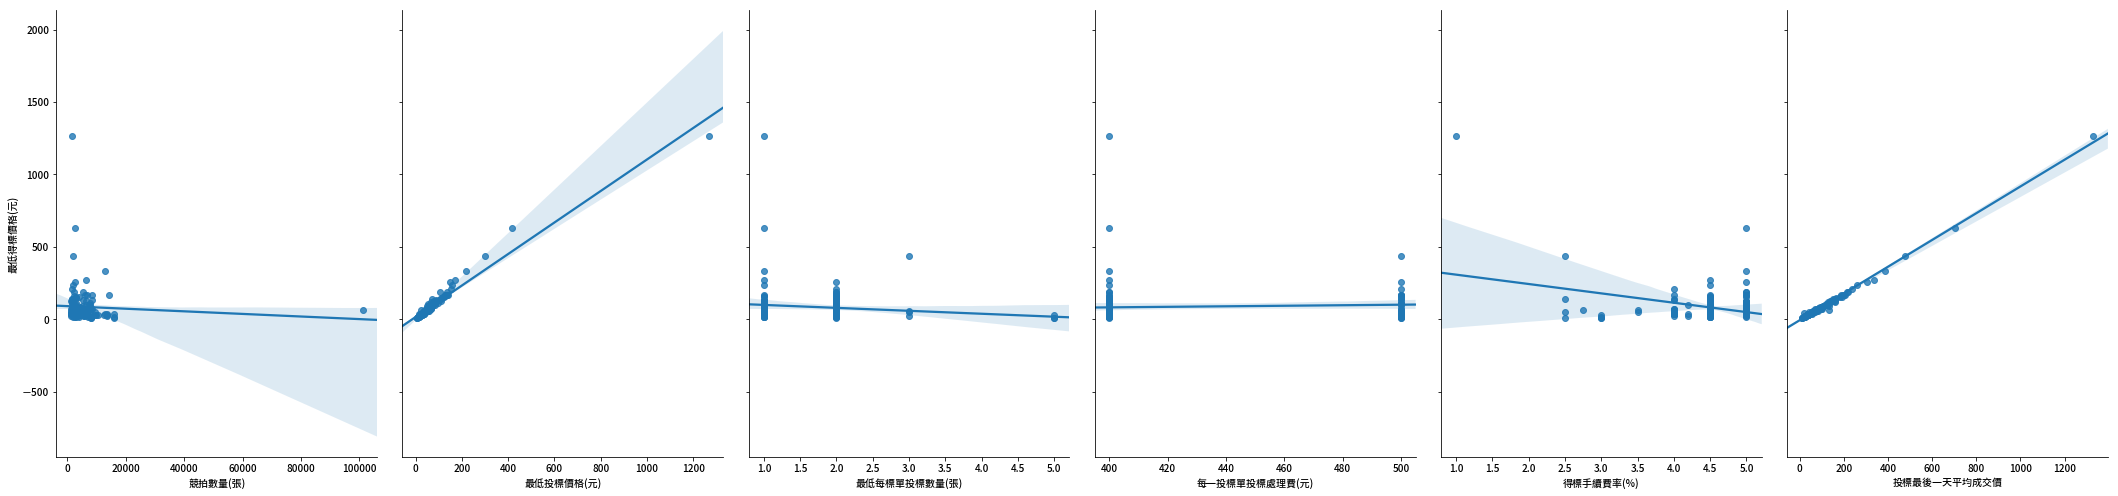

In [110]:
sn.pairplot(df_1, x_vars=['競拍數量(張)','最低投標價格(元)','最低每標單投標數量(張)','每一投標單投標處理費(元)','得標手續費率(%)','投標最後一天平均成交價'], y_vars='最低得標價格(元)', size=7, aspect=0.7, kind='reg')

In [111]:
outlier = df_1['最低投標價格(元)'] > 1200
df_1[outlier]

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),每一投標單投標處理費(元),得標手續費率(%),投標最後一天平均成交價,最低得標價格(元),撥券日開盤價
159,2017/9/18,精測,6510,櫃檯買賣,上櫃增資,1530,1267.33,1,400,1.0,1330.0,1267.33,1250.0


In [112]:
#index = df_1[outlier].index
#df_1.drop(index, inplace = True)

In [113]:
outlier = df_1['競拍數量(張)'] > 80000
df_1[outlier]

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),每一投標單投標處理費(元),得標手續費率(%),投標最後一天平均成交價,最低得標價格(元),撥券日開盤價
57,2019/11/25,和潤企業,6592,集中交易市場,初上市,101081,45.69,2,400,2.75,130.59,60.88,82.0


In [114]:
#index = df_1[outlier].index
#df_1.drop(index, inplace = True)

C:\Users\hello\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


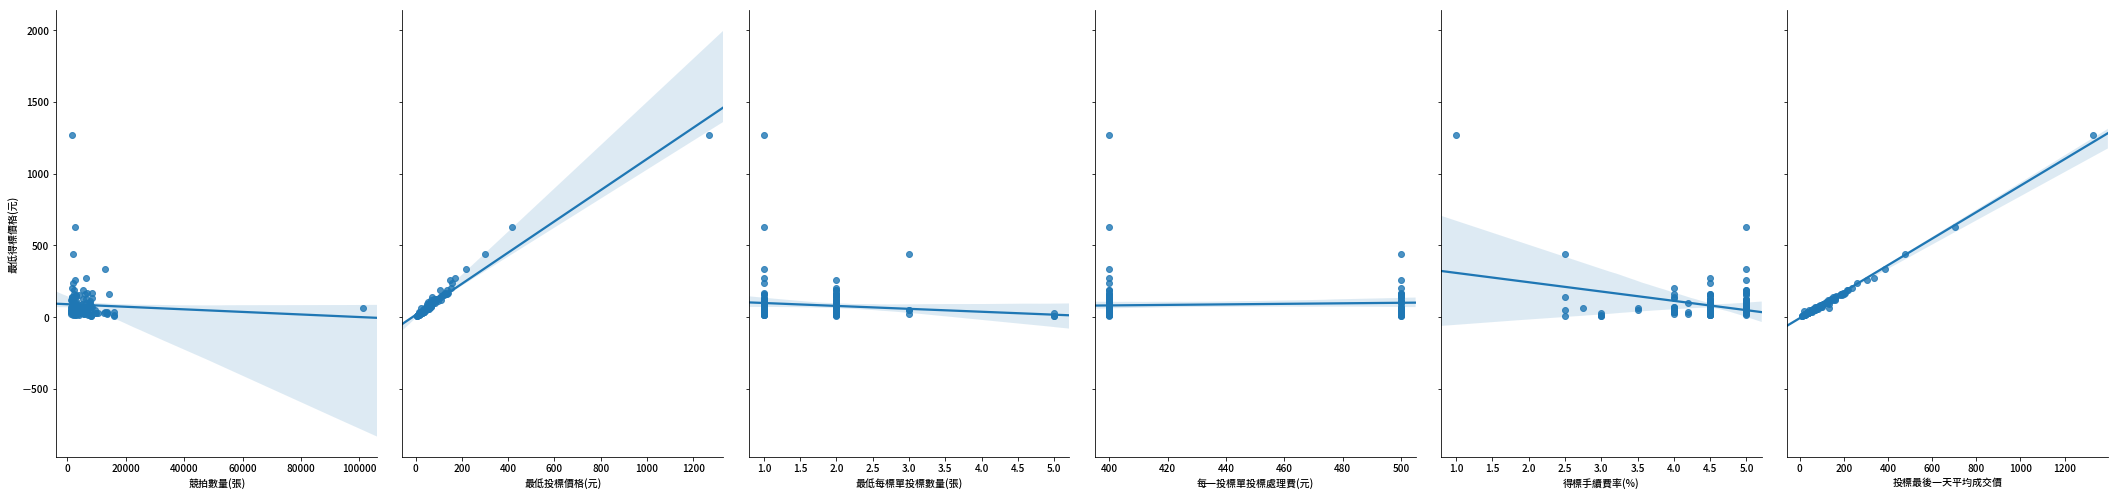

In [115]:
sn.pairplot(df_1, x_vars=['競拍數量(張)','最低投標價格(元)','最低每標單投標數量(張)','每一投標單投標處理費(元)','得標手續費率(%)','投標最後一天平均成交價'], y_vars='最低得標價格(元)', size=7, aspect=0.7, kind='reg')

In [116]:
df_1['發行性質'].value_counts()

初上櫃     89
初上市     54
上櫃增資     1
Name: 發行性質, dtype: int64

In [117]:
index = df_1[df_1['發行性質']=='第一上市初上市'].index
df_1.drop(index, inplace = True)

In [118]:
dummies = pd.get_dummies(df_1['發行性質'])
df_1 = pd.concat([df_1, dummies], axis = 1)
df_1.drop(['發行性質'], axis = 1, inplace = True)
df_1.drop(['初上櫃'], axis = 1, inplace = True)   ## 將發行性質轉成類別變數 上市=1, 上櫃=0

In [119]:
dummies = pd.get_dummies(df_1['每一投標單投標處理費(元)'])
dummies.columns = ['處理費_400','處理費_500']
df_1 = pd.concat([df_1, dummies], axis = 1)
df_1.drop(['每一投標單投標處理費(元)', '處理費_500'], axis = 1, inplace = True)    ## 處理費轉為類別變數 處利費400=1, 500=0

In [120]:
dummies = pd.get_dummies(df_1['最低每標單投標數量(張)'])
dummies.columns = ['最低每標單投_1','最低每標單投_2','最低每標單投_3','最低每標單投_5']
df_1 = pd.concat([df_1, dummies], axis = 1)
df_1.drop(['最低每標單投標數量(張)', '最低每標單投_5'], axis = 1, inplace = True)
df_1.columns

Index(['開標日期', '證券名稱', '證券代號', '發行市場', '競拍數量(張)', '最低投標價格(元)', '得標手續費率(%)',
       '投標最後一天平均成交價', '最低得標價格(元)', '撥券日開盤價', '上櫃增資', '初上市', '處理費_400',
       '最低每標單投_1', '最低每標單投_2', '最低每標單投_3'],
      dtype='object')

In [121]:
df_1.shape

(144, 16)

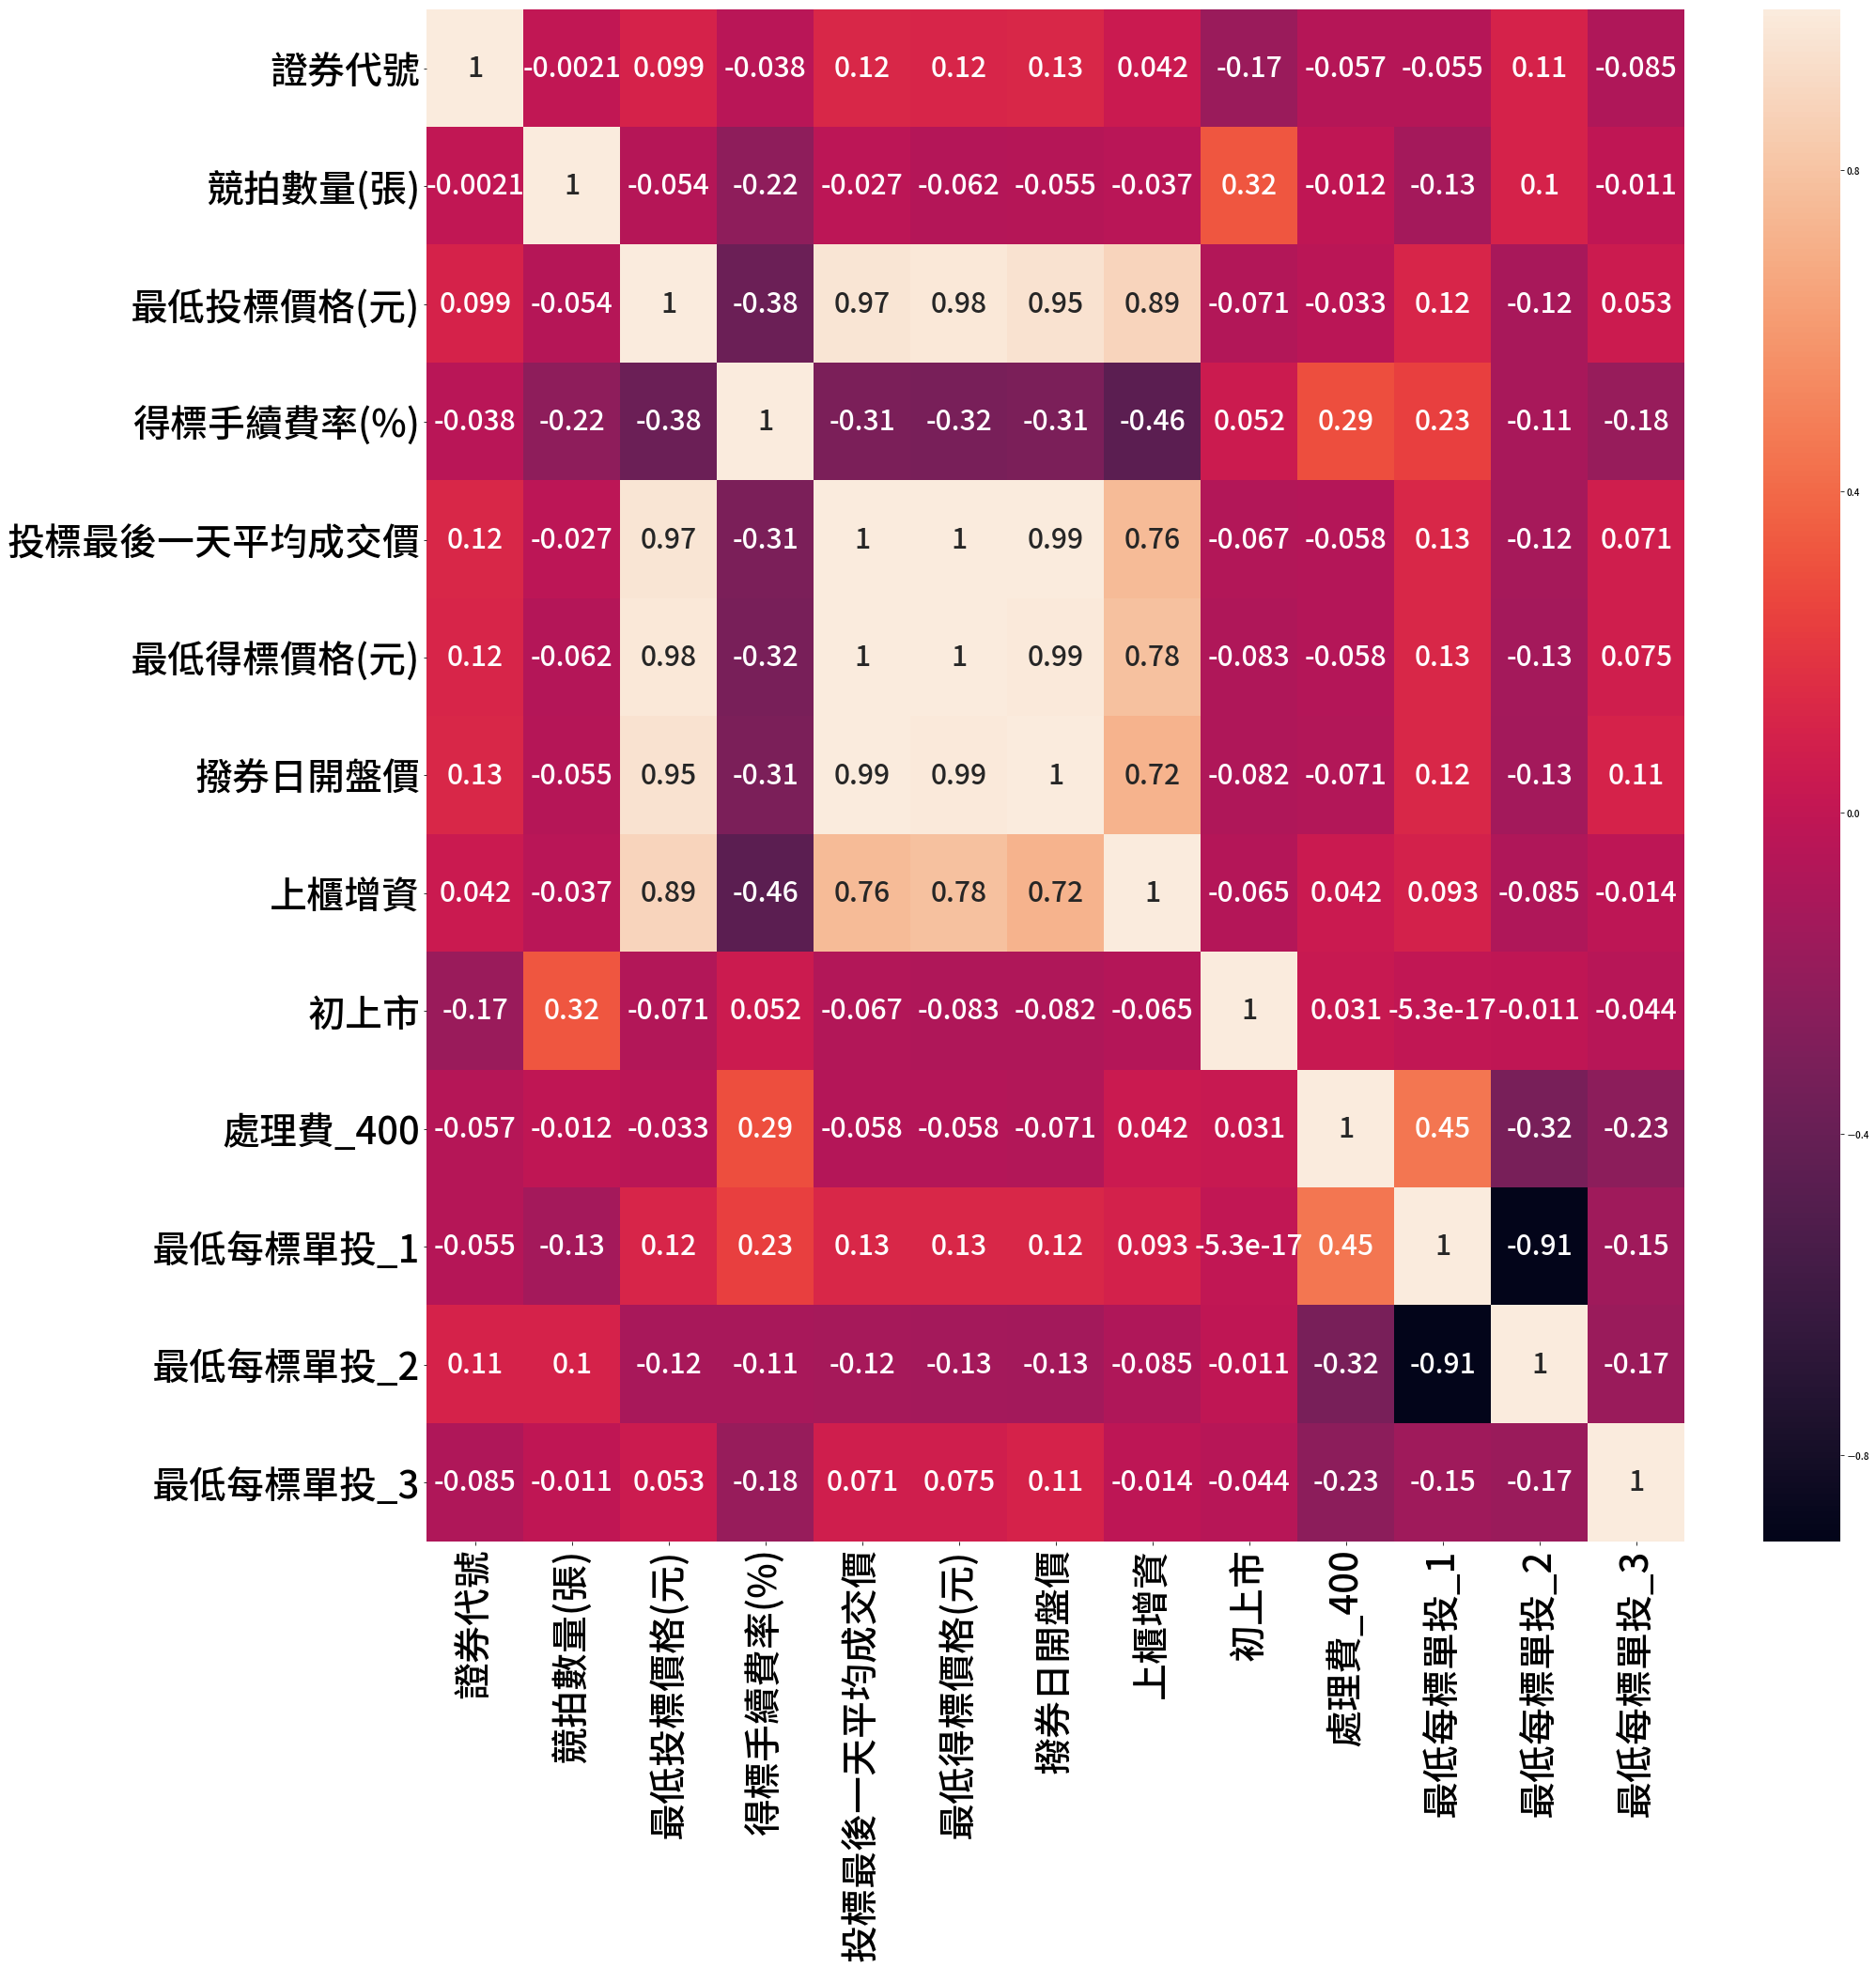

In [122]:
plt.figure(figsize=(30, 30))
corrMatrix = df_1.corr()

res = sn.heatmap(corrMatrix, annot=True, annot_kws={"size": 30})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 40, rotation = 90)

res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 40, rotation = 0)
plt.show()

C:\Users\hello\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


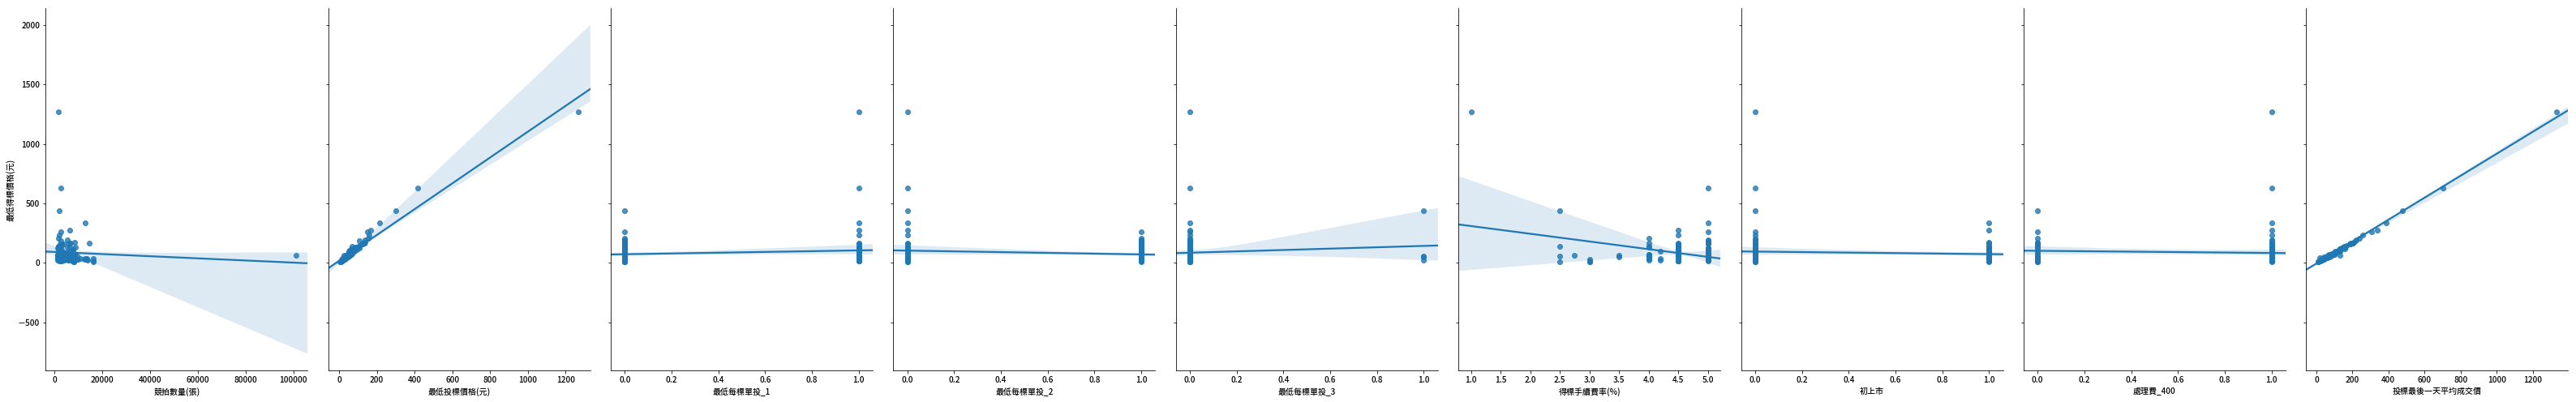

In [123]:
sn.pairplot(df_1, x_vars=['競拍數量(張)','最低投標價格(元)','最低每標單投_1','最低每標單投_2','最低每標單投_3','得標手續費率(%)','初上市','處理費_400','投標最後一天平均成交價'], y_vars='最低得標價格(元)', size=7, aspect=0.7, kind='reg')

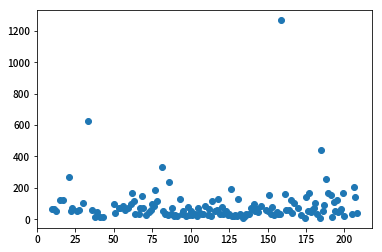

In [124]:
plt.scatter(df_1.index, df_1['最低得標價格(元)'])

In [125]:
df_1[df_1['最低得標價格(元)']> 600]

,開標日期,證券名稱,證券代號,發行市場,競拍數量(張),最低投標價格(元),得標手續費率(%),投標最後一天平均成交價,最低得標價格(元),撥券日開盤價,上櫃增資,初上市,處理費_400,最低每標單投_1,最低每標單投_2,最低每標單投_3
33,2020/5/25,昇佳電子,6732,櫃檯買賣,2546,415.00,5.0,702.06,628.01,730.0,0,0,1,1,0,0
159,2017/9/18,精測,6510,櫃檯買賣,1530,1267.33,1.0,1330.00,1267.33,1250.0,1,0,1,1,0,0


In [126]:
## index = df_1[df_1['最低得標價格(元)']> 600].index
## df_1.drop(index, inplace = True)

## 切資料 將最近的30筆當作test 其他的拿去train

In [127]:
df_1['開標日期'] = pd.to_datetime(df_1['開標日期'])
df_1['開標日期']

10    2020-11-17
11    2020-11-10
12    2020-11-06
15    2020-10-16
17    2020-10-05
         ...    
200   2016-10-13
205   2016-12-05
206   2016-12-07
207   2016-12-14
208   2016-12-16
Name: 開標日期, Length: 144, dtype: datetime64[ns]

In [128]:
df_1 = df_1.sort_values(by = '開標日期', ascending = False)
df_1.reset_index(inplace = True, drop = True)
df_1.head()

,開標日期,證券名稱,證券代號,發行市場,競拍數量(張),最低投標價格(元),得標手續費率(%),投標最後一天平均成交價,最低得標價格(元),撥券日開盤價,上櫃增資,初上市,處理費_400,最低每標單投_1,最低每標單投_2,最低每標單投_3
0,2020-11-17,亞泰金屬,6727,櫃檯買賣,2005,48.00,5.0,68.97,62.4,66.2,0,0,1,1,0,0
1,2020-11-10,八貫,1342,集中交易市場,4234,50.00,4.5,76.48,63.6,63.0,0,1,1,1,0,0
2,2020-11-06,陞達科技,4945,櫃檯買賣,2244,34.86,5.0,40.32,49.9,52.8,0,0,1,1,0,0
3,2020-10-16,意德士,7556,櫃檯買賣,1712,80.00,5.0,141.45,124.0,115.0,0,0,1,1,0,0
4,2020-10-05,軒郁,6703,櫃檯買賣,2040,80.08,5.0,138.26,123.0,125.0,0,0,1,1,0,0


In [129]:
## 除了類別資料 都套上scaler
#sclaler = MinMaxScaler()
#num_vars = ['競拍數量(張)', '最低投標價格(元)', '投標最後一天平均成交價', '最低得標價格(元)', '得標手續費率(%)']
#df_1[num_vars] = sclaler.fit_transform(df_1[num_vars])
#df_1.head()

In [130]:
## 切前30筆當作test data 剩下當作 train data
test_df = df_1.iloc[:30]
train_df = df_1.iloc[30:]

In [131]:
def minmaxscale(x, a, b):
    min_value = X_train['投標最後一天平均成交價'].min()
    max_value = X_train['投標最後一天平均成交價'].max()
    scale_x = x.apply(lambda x: (x- min_value)/ (max_value - min_value)* (b-a) + a)
    return scale_x 

In [132]:
X_train = train_df[['競拍數量(張)','最低投標價格(元)','最低每標單投_1','最低每標單投_2','最低每標單投_3','得標手續費率(%)','初上市','處理費_400','投標最後一天平均成交價']]
X_train['最後一天平均價_平方'] = [i**2 for i in X_train['投標最後一天平均成交價']]

#X_train['最後一天平均價_平方'] = minmaxscale(X_train['最後一天平均價_平方'], 81, 2500)

X_train['最後一天平均價_立方'] = [i**3 for i in X_train['投標最後一天平均成交價']]
#X_train['最後一天平均價_立方'] = minmaxscale(X_train['最後一天平均價_立方'], 250, 10000)
y_train = train_df['最低得標價格(元)']

In [133]:
X_test = test_df[['競拍數量(張)','最低投標價格(元)','最低每標單投_1','最低每標單投_2','最低每標單投_3','得標手續費率(%)','初上市','處理費_400','投標最後一天平均成交價']]
X_test['最後一天平均價_平方'] = [i**2 for i in X_test['投標最後一天平均成交價']]
#X_test['最後一天平均價_平方'] = minmaxscale(X_test['最後一天平均價_平方'], 81, 2500)

X_test['最後一天平均價_立方'] = [i**3 for i in X_test['投標最後一天平均成交價']]
#X_test['最後一天平均價_立方'] = minmaxscale(X_test['最後一天平均價_立方'], 250, 10000)
y_test = test_df['最低得標價格(元)']

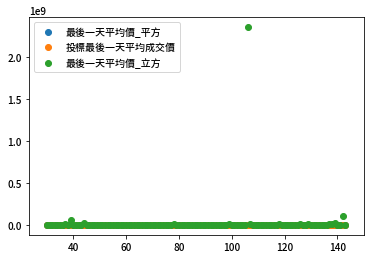

In [134]:
plt.scatter(X_train.index, X_train['最後一天平均價_平方'])
plt.scatter(X_train.index, X_train['投標最後一天平均成交價'])
plt.scatter(X_train.index, X_train['最後一天平均價_立方'])
plt.legend()

In [135]:
y_train.shape, X_train.shape

((114,), (114, 11))

In [136]:
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
9,最後一天平均價_平方,885.73
10,最後一天平均價_立方,678.73
1,最低投標價格(元),308.77
8,投標最後一天平均成交價,283.10
5,得標手續費率(%),47.65
3,最低每標單投_2,22.42
2,最低每標單投_1,14.44
7,處理費_400,5.93
0,競拍數量(張),4.47
6,初上市,2.51


In [137]:
x_train1 = X_train[['投標最後一天平均成交價', '得標手續費率(%)', '最低每標單投_1','最低每標單投_2','最低每標單投_3', '處理費_400', '競拍數量(張)', '初上市']]
x_train1_c = sm.add_constant(x_train1)
lm1 = sm.OLS(y_train, x_train1_c).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     4624.
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          4.45e-130
Time:                        17:03:12   Log-Likelihood:                -381.88
No. Observations:                 114   AIC:                             781.8
Df Residuals:                     105   BIC:                             806.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          22.4514      6.349      3.536      0.001       9.862      35.041
投標最後一天平均成交價     0.9234      0.006    167.322      0.000       0.912       0.934
得標手續費率(%)      -6.3836      1.250     -5.105      0.000      -8.863      -3.904
最低每標單投_1       -2.5703      4.849     -0.530      0.597     -12.185       7.045
最低每標單投_2       -2.3357      4.602     -0.508      0.613     -11.460       6.789
最低每標單投_3       -2.2965      5.697     -0.403      0.688     -13.592       8.999
處理費_400         3.2840      1.779      1.846      0.068      -0.244       6.812
競拍數量(張)      -6.99e-05      0.000     -0.302      0.763      -0.001       0.000
初上市            -1.5009      1.708     -0.879      0.381      -4.887       1.885
==============================================================================
Omnibus:                       33.914   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.788
Skew:                           0.948   Prob(JB):                     2.17e-27
Kurtosis:                       7.717   Cond. No.                     8.39e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [138]:
vif1 = pd.DataFrame()
vif1['features'] = x_train1.columns
vif1["VIF"] = [variance_inflation_factor(x_train1.values, i) for i in range(x_train1.shape[1])]
vif1['VIF'] = round(vif1['VIF'], 2)
vif1 = vif1.sort_values(by = "VIF", ascending = False)
vif1

,features,VIF
1,得標手續費率(%),36.93
3,最低每標單投_2,21.56
2,最低每標單投_1,13.98
5,處理費_400,5.21
6,競拍數量(張),4.12
7,初上市,2.44
4,最低每標單投_3,1.98
0,投標最後一天平均成交價,1.72


In [139]:
x_train2 = X_train[['投標最後一天平均成交價', '得標手續費率(%)','最低每標單投_3', '初上市']]
x_train2_c = sm.add_constant(x_train2)
lm2 = sm.OLS(y_train, x_train2_c).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     9242.
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          5.84e-137
Time:                        17:03:13   Log-Likelihood:                -384.04
No. Observations:                 114   AIC:                             778.1
Df Residuals:                     109   BIC:                             791.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          20.8952      5.353      3.903      0.000      10.286      31.505
投標最後一天平均成交價     0.9232      0.005    174.556      0.000       0.913       0.934
得標手續費率(%)      -6.0496      1.174     -5.154      0.000      -8.376      -3.723
最低每標單投_3       -1.4199      3.720     -0.382      0.703      -8.792       5.952
初上市            -1.6898      1.397     -1.209      0.229      -4.459       1.080
==============================================================================
Omnibus:                       22.532   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.480
Skew:                           0.613   Prob(JB):                     8.18e-16
Kurtosis:                       6.623   Cond. No.                     1.39e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [140]:
vif2 = pd.DataFrame()
vif2['features'] = x_train2.columns
vif2["VIF"] = [variance_inflation_factor(x_train2.values, i) for i in range(x_train2.shape[1])]
vif2['VIF'] = round(vif2['VIF'], 2)
vif2 = vif2.sort_values(by = "VIF", ascending = False)
vif2

,features,VIF
1,得標手續費率(%),2.09
3,初上市,1.66
0,投標最後一天平均成交價,1.40
2,最低每標單投_3,1.04


In [141]:
x_train3 = X_train[['投標最後一天平均成交價', '得標手續費率(%)', '初上市']]
x_train3_c = sm.add_constant(x_train3)
lm3 = sm.OLS(y_train, x_train3_c).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.242e+04
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          5.18e-139
Time:                        17:03:14   Log-Likelihood:                -384.12
No. Observations:                 114   AIC:                             776.2
Df Residuals:                     110   BIC:                             787.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          20.5404      5.251      3.912      0.000      10.134      30.947
投標最後一天平均成交價     0.9231      0.005    175.248      0.000       0.913       0.934
得標手續費率(%)      -5.9802      1.155     -5.177      0.000      -8.269      -3.691
初上市            -1.6742      1.391     -1.203      0.231      -4.431       1.083
==============================================================================
Omnibus:                       23.225   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.226
Skew:                           0.635   Prob(JB):                     2.07e-16
Kurtosis:                       6.687   Cond. No.                     1.36e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [142]:
x_train4 = X_train[['投標最後一天平均成交價', '得標手續費率(%)']]
x_train4_c = sm.add_constant(x_train4)
lm4 = sm.OLS(y_train, x_train4_c).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.855e+04
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          6.90e-141
Time:                        17:03:14   Log-Likelihood:                -384.86
No. Observations:                 114   AIC:                             775.7
Df Residuals:                     111   BIC:                             783.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          20.5476      5.262      3.905      0.000      10.121      30.974
投標最後一天平均成交價     0.9234      0.005    175.053      0.000       0.913       0.934
得標手續費率(%)      -6.1358      1.150     -5.334      0.000      -8.415      -3.857
==============================================================================
Omnibus:                       23.446   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.615
Skew:                           0.627   Prob(JB):                     3.81e-17
Kurtosis:                       6.787   Cond. No.                     1.36e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [143]:
x_train8 = X_train[['投標最後一天平均成交價']]
x_train8_c = sm.add_constant(x_train8)
lm8 = sm.OLS(y_train, x_train8_c).fit()
lm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 2.978e+04
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          1.01e-137
Time:                        17:03:14   Log-Likelihood:                -397.87
No. Observations:                 114   AIC:                             799.7
Df Residuals:                     112   BIC:                             805.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -7.1767      0.917     -7.824      0.000      -8.994      -5.359
投標最後一天平均成交價     0.9344      0.005    172.563      0.000       0.924       0.945
==============================================================================
Omnibus:                       17.984   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.983
Skew:                           0.172   Prob(JB):                     2.60e-18
Kurtosis:                       7.115   Cond. No.                         207.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [144]:
x_train5 = X_train[['投標最後一天平均成交價', '得標手續費率(%)','最低每標單投_3', '初上市','最後一天平均價_平方']]
x_train5_c = sm.add_constant(x_train5)
lm5 = sm.OLS(y_train, x_train5_c).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.427e+04
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          1.51e-150
Time:                        17:03:14   Log-Likelihood:                -346.13
No. Observations:                 114   AIC:                             704.3
Df Residuals:                     108   BIC:                             720.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.0875      4.002      2.521      0.013       2.155      18.020
投標最後一天平均成交價     0.8434      0.009     96.179      0.000       0.826       0.861
得標手續費率(%)      -2.3003      0.923     -2.491      0.014      -4.131      -0.470
最低每標單投_3        3.3008      2.720      1.214      0.228      -2.091       8.692
初上市            -1.9728      1.007     -1.959      0.053      -3.969       0.023
最後一天平均價_平方   7.856e-05   7.78e-06     10.102      0.000    6.31e-05     9.4e-05
==============================================================================
Omnibus:                       42.082   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.224
Skew:                           1.000   Prob(JB):                     1.15e-57
Kurtosis:                      10.156   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [145]:
vif5 = pd.DataFrame()
vif5['features'] = x_train5.columns
vif5["VIF"] = [variance_inflation_factor(x_train5.values, i) for i in range(x_train5.shape[1])]
vif5['VIF'] = round(vif5['VIF'], 2)
vif5 = vif5.sort_values(by = "VIF", ascending = False)
vif5

,features,VIF
0,投標最後一天平均成交價,9.36
4,最後一天平均價_平方,6.79
1,得標手續費率(%),3.60
3,初上市,1.66
2,最低每標單投_3,1.05


In [146]:
x_train6 = X_train[['投標最後一天平均成交價', '得標手續費率(%)','初上市','最後一天平均價_平方']]
x_train6_c = sm.add_constant(x_train6)
lm6 = sm.OLS(y_train, x_train6_c).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.776e+04
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          2.20e-152
Time:                        17:03:15   Log-Likelihood:                -346.90
No. Observations:                 114   AIC:                             703.8
Df Residuals:                     109   BIC:                             717.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          11.1110      3.920      2.834      0.005       3.341      18.881
投標最後一天平均成交價     0.8451      0.009     97.425      0.000       0.828       0.862
得標手續費率(%)      -2.5343      0.905     -2.800      0.006      -4.328      -0.740
初上市            -2.0021      1.009     -1.985      0.050      -4.002      -0.003
最後一天平均價_平方   7.694e-05   7.68e-06     10.021      0.000    6.17e-05    9.22e-05
==============================================================================
Omnibus:                       42.706   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              261.822
Skew:                           1.028   Prob(JB):                     1.40e-57
Kurtosis:                      10.134   Cond. No.                     1.39e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [147]:
vif6 = pd.DataFrame()
vif6['features'] = x_train6.columns
vif6["VIF"] = [variance_inflation_factor(x_train6.values, i) for i in range(x_train6.shape[1])]
vif6['VIF'] = round(vif6['VIF'], 2)
vif6 = vif6.sort_values(by = "VIF", ascending = False)
vif6

,features,VIF
0,投標最後一天平均成交價,9.14
3,最後一天平均價_平方,6.69
1,得標手續費率(%),3.60
2,初上市,1.66


In [148]:
x_train7 = X_train[['投標最後一天平均成交價', '得標手續費率(%)', '初上市','最後一天平均價_立方']]
x_train7_c = sm.add_constant(x_train7)
lm7 = sm.OLS(y_train, x_train7_c).fit()
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.669e+04
Date:                Mon, 21 Dec 2020   Prob (F-statistic):          6.34e-151
Time:                        17:03:15   Log-Likelihood:                -350.41
No. Observations:                 114   AIC:                             710.8
Df Residuals:                     109   BIC:                             724.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          11.7392      4.036      2.909      0.004       3.741      19.738
投標最後一天平均成交價     0.8675      0.007    121.752      0.000       0.853       0.882
得標手續費率(%)      -2.9171      0.923     -3.160      0.002      -4.747      -1.087
初上市            -2.0213      1.041     -1.943      0.055      -4.084       0.041
最後一天平均價_立方   4.483e-08   4.78e-09      9.375      0.000    3.54e-08    5.43e-08
==============================================================================
Omnibus:                       42.803   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              261.627
Skew:                           1.032   Prob(JB):                     1.54e-57
Kurtosis:                      10.129   Cond. No.                     1.82e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [149]:
vif7 = pd.DataFrame()
vif7['features'] = x_train7.columns
vif7["VIF"] = [variance_inflation_factor(x_train7.values, i) for i in range(x_train7.shape[1])]
vif7['VIF'] = round(vif7['VIF'], 2)
vif7 = vif7.sort_values(by = "VIF", ascending = False)
vif7

,features,VIF
0,投標最後一天平均成交價,5.78
3,最後一天平均價_立方,4.19
1,得標手續費率(%),3.20
2,初上市,1.66


* lm2 Y ~ '投標最後一天平均成交價', '得標手續費率(%)', '初上市', '最低每標單投_3'
* lm3 Y ~ '投標最後一天平均成交價', '得標手續費率(%)', '初上市'
* lm4 Y ~ '投標最後一天平均成交價', '得標手續費率(%)'
* lm8 Y ~ '投標最後一天平均成交價'

In [150]:
def vif_df(X):
    vif_df = pd.DataFrame()
    vif_df['features'] = X.columns
    vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif_df['VIF'] = round(vif_df['VIF'], 2)
    vif_df = vif_df.sort_values(by = "VIF", ascending = False)
    return(vif_df)

In [151]:
vif_summary = vif1
trainx_list = [x_train1, x_train2,x_train3, x_train4, x_train5, x_train6, x_train7] 
for xlist in trainx_list:
    vif = vif_df(xlist)
    vif_summary = pd.merge(vif_summary, vif, on = 'features', how = 'outer')
vif_summary.columns = ['features','vif', 'vif1','vif2', 'vif3', 'vif4','vif5', 'vif6', 'vif7']
vif_summary

,features,vif,vif1,vif2,vif3,vif4,vif5,vif6,vif7
0,得標手續費率(%),36.93,36.93,2.09,2.08,1.38,3.60,3.60,3.20
1,最低每標單投_2,21.56,21.56,NaN,NaN,NaN,NaN,NaN,NaN
2,最低每標單投_1,13.98,13.98,NaN,NaN,NaN,NaN,NaN,NaN
3,處理費_400,5.21,5.21,NaN,NaN,NaN,NaN,NaN,NaN
4,競拍數量(張),4.12,4.12,NaN,NaN,NaN,NaN,NaN,NaN
5,初上市,2.44,2.44,1.66,1.66,NaN,1.66,1.66,1.66
6,最低每標單投_3,1.98,1.98,1.04,NaN,NaN,1.05,NaN,NaN
7,投標最後一天平均成交價,1.72,1.72,1.40,1.38,1.38,9.36,9.14,5.78
8,最後一天平均價_平方,NaN,NaN,NaN,NaN,NaN,6.79,6.69,NaN
9,最後一天平均價_立方,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.19


In [152]:
lm2.params

const          20.895185
投標最後一天平均成交價     0.923155
得標手續費率(%)      -6.049646
最低每標單投_3       -1.419949
初上市            -1.689826
dtype: float64

In [153]:
model_list = [lm2, lm3, lm4]
aic = []
bic = []
mse = []
a_rsq = []

for model in model_list:
    aic.append(model.aic)
    bic.append(model.bic)
    mse.append(model.mse_resid)
    a_rsq.append(model.rsquared_adj)

select_df =  pd.DataFrame()
select_df['AIC'] = aic
select_df["BIC"] = bic
select_df['MSE'] = mse
select_df["A_RSQ"] = a_rsq
select_df.index = ['lm2', 'lm3', 'lm4']
select_df

,AIC,BIC,MSE,A_RSQ
lm2,778.085718,791.766710,51.653994,0.996952
lm3,776.238026,787.182820,51.252842,0.996976
lm4,775.729106,783.937702,51.459798,0.996964


## 殘差分析
### error terms = y_actual - y_predicted

In [173]:
y_train_pred2 = lm2.predict(x_train2_c)
res2 = y_train - y_train_pred2
print('MSE for lm2_train: %f' %(sum([i**2 for i in res2])/ len(res2)))

y_train_pred3 = lm3.predict(x_train3_c)
res3 = y_train - y_train_pred3
print('MSE for lm3_train: %f' %(sum([i**2 for i in res3])/ len(res3)))

y_train_pred4 = lm4.predict(x_train4_c)
res4 = y_train - y_train_pred4
print('MSE for lm4_train: %f' %(sum([i**2 for i in res4])/ len(res4)))

y_train_pred5 = lm5.predict(x_train5_c)
res5 = y_train - y_train_pred5
print('MSE for lm5_train: %f' %(sum([i**2 for i in res5])/ len(res5)))

y_train_pred6 = lm6.predict(x_train6_c)
res6 = y_train - y_train_pred6
print('MSE for lm6_train: %f' %(sum([i**2 for i in res6])/ len(res6)))

y_train_pred7 = lm7.predict(x_train7_c)
res7 = y_train - y_train_pred7
print('MSE for lm7_train: %f' %(sum([i**2 for i in res7])/ len(res7)))

y_train_pred8 = lm8.predict(x_train8_c)
res8 = y_train - y_train_pred8
print('MSE for lm8_train: %f' %(sum([i**2 for i in res8])/ len(res8)))

MSE for lm2_train: 49.388468
MSE for lm3_train: 49.454497
MSE for lm4_train: 50.105593
MSE for lm5_train: 25.394331
MSE for lm6_train: 25.740602
MSE for lm7_train: 27.377825
MSE for lm8_train: 62.951043


In [172]:

X_test2 = X_test[['投標最後一天平均成交價', '得標手續費率(%)','最低每標單投_3', '初上市']]
x_test_lm2 = sm.add_constant(X_test2)
y_test_pred2 = lm2.predict(x_test_lm2)
res2 = y_test - y_test_pred2
print('MSE for lm2_test: %f' %(sum([i**2 for i in res2])/ len(res2)))

X_test3 = X_test[['投標最後一天平均成交價', '得標手續費率(%)', '初上市']]
x_test_lm3 = sm.add_constant(X_test3)
y_test_pred3 = lm3.predict(x_test_lm3)
res3 = y_test - y_test_pred3
print('MSE for lm3_test: %f' %(sum([i**2 for i in res3])/ len(res3)))

X_test4 = X_test[['投標最後一天平均成交價', '得標手續費率(%)']]
x_test_lm4 = sm.add_constant(X_test4)
y_test_pred4 = lm4.predict(x_test_lm4)
res4 = y_test - y_test_pred4
print('MSE for lm4_test: %f' %(sum([i**2 for i in res4])/ len(res4)))

X_test5 = X_test[['投標最後一天平均成交價', '得標手續費率(%)','最低每標單投_3', '初上市', '最後一天平均價_平方']]
x_test_lm5 = sm.add_constant(X_test5)
y_test_pred5 = lm5.predict(x_test_lm5)
res5 = y_test - y_test_pred5
print('MSE for lm5_test: %f' %(sum([i**2 for i in res5])/ len(res5)))

X_test6 = X_test[['投標最後一天平均成交價', '得標手續費率(%)', '初上市', '最後一天平均價_平方']]
x_test_lm6 = sm.add_constant(X_test6)
y_test_pred6 = lm6.predict(x_test_lm6)
res6 = y_test - y_test_pred6
print('MSE for lm6_test: %f' %(sum([i**2 for i in res6])/ len(res6)))

X_test7 = X_test[['投標最後一天平均成交價', '得標手續費率(%)', '初上市', '最後一天平均價_立方']]
x_test_lm7 = sm.add_constant(X_test7)
y_test_pred7 = lm7.predict(x_test_lm7)
res7 = y_test - y_test_pred7
print('MSE for lm7_test: %f' %(sum([i**2 for i in res7])/ len(res7)))

X_test8 = X_test[['投標最後一天平均成交價']]
x_test_lm8 = sm.add_constant(X_test8)
y_test_pred8 = lm8.predict(x_test_lm8)
res8 = y_test - y_test_pred8
print('MSE for lm8_test: %f' %(sum([i**2 for i in res8])/ len(res8)))

MSE for lm2_test: 227.543821
MSE for lm3_test: 226.892970
MSE for lm4_test: 237.735992
MSE for lm5_test: 141.460256
MSE for lm6_test: 144.101098
MSE for lm7_test: 150.511260
MSE for lm8_test: 208.781440


(-30, 30)

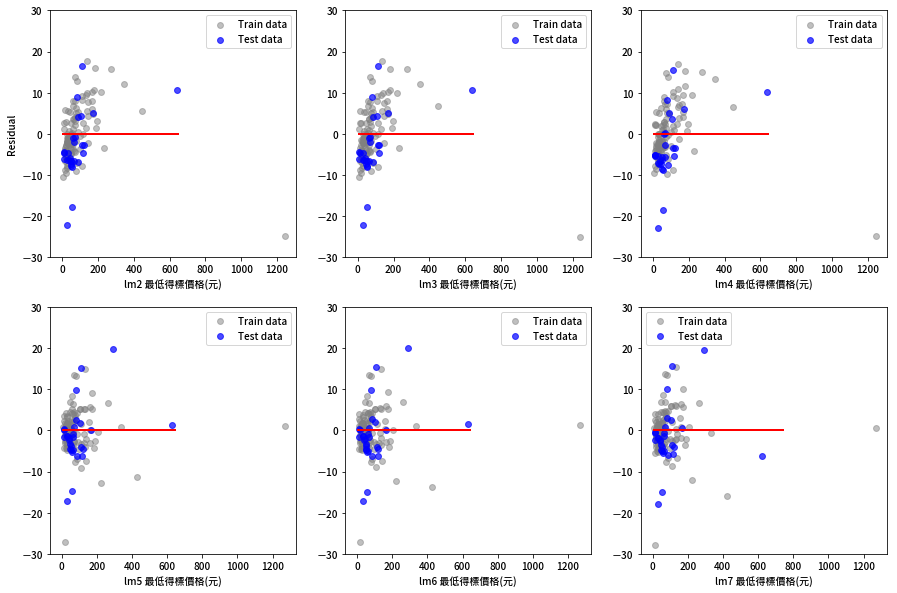

In [156]:
plt.figure(figsize=(15, 10))

plt.subplot(2,3,1)
plt.scatter(y_train_pred2, y_train_pred2 - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test_pred2, y_test_pred2 - y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('lm2 最低得標價格(元)')
plt.ylabel('Residual')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 650, lw = 2, color = 'red')
plt.ylim(-30,30)

plt.subplot(2,3,2)
plt.scatter(y_train_pred3, y_train_pred3 - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test_pred3, y_test_pred3 - y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('lm3 最低得標價格(元)')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 650, lw = 2, color = 'red')
plt.ylim(-30,30)

plt.subplot(2,3,3)
plt.scatter(y_train_pred4, y_train_pred4 - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test_pred4, y_test_pred4 - y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('lm4 最低得標價格(元)')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 650, lw = 2, color = 'red')
plt.ylim(-30,30)

plt.subplot(2,3,4)
plt.scatter(y_train_pred5, y_train_pred5 - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test_pred5, y_test_pred5 - y_test,
             c = 'blue', marker = 'o', s = 35, alpha = 0.7,
             label = 'Test data')
plt.xlabel('lm5 最低得標價格(元)')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 650, lw = 2, color = 'red')
plt.ylim(-30,30)

plt.subplot(2,3,5)
plt.scatter(y_train_pred6, y_train_pred6 - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test_pred6, y_test_pred6 - y_test,
             c = 'blue', marker = 'o', s = 35, alpha = 0.7,
             label = 'Test data')
plt.xlabel('lm6 最低得標價格(元)')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 650, lw = 2, color = 'red')
plt.ylim(-30,30)

plt.subplot(2,3,6)
plt.scatter(y_train_pred7, y_train_pred7 - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test_pred7, y_test_pred7 - y_test,
             c = 'blue', marker = 'o', s = 35, alpha = 0.7,
             label = 'Test data')
plt.xlabel('lm7 最低得標價格(元)')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 750, lw = 2, color = 'red')
plt.ylim(-30,30)

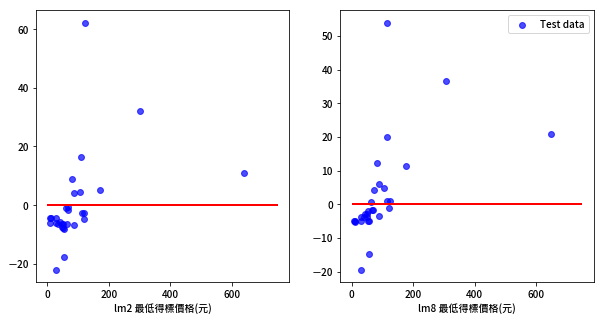

In [185]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
#plt.scatter(y_train_pred2, y_train_pred2 - y_train,
    #      c = 'gray', marker = 'o', s = 35, alpha = 0.5,
     #     label = 'Train data')
plt.scatter(y_test_pred2, y_test_pred2 - y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.hlines(y = 0, xmin = 0, xmax = 750, lw = 2, color = 'red')
plt.xlabel('lm2 最低得標價格(元)')

plt.subplot(1,2,2)
plt.scatter(y_test_pred8, y_test_pred8 - y_test,
             c = 'blue', marker = 'o', s = 35, alpha = 0.7,
             label = 'Test data')
plt.xlabel('lm8 最低得標價格(元)')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 750, lw = 2, color = 'red')
#plt.ylim(-30,30)

## 從MSE看出lm4表現最差 所以只留下lm2和lm3進到回測階段

## 策略1: 用預測價格投1張 然後開盤賣

In [157]:

def success_n_profit(df_stock, pred):
    df_output = pd.DataFrame()
    df_output['最低投標價格(元)'] = df_stock['最低投標價格(元)']
    df_output['最低得標價格(元)'] = df_stock['最低得標價格(元)']
    df_output['投標價'] = pred
    df_output['撥券日開盤價'] = df_stock['撥券日開盤價']
    df_output['得標'] = 0
    df_output['得標'] = np.where(df_output['投標價'] >= df_output['最低得標價格(元)'], 1, 0)
    df_output['獲利'] = np.where(df_output['得標'] == 1, (df_output['撥券日開盤價']*1000 - (500 + df_output['投標價']*1.05*1000)), -500)
    df_output['有賺錢'] = np.where(df_output['獲利'] > 0 , 1, 0)
    df_output['累積損益'] = df_output['獲利'].cumsum()

    return df_output

In [158]:
## max_profit為用最低得標價格當投標價格

max_profit = success_n_profit(test_df, test_df['最低得標價格(元)'])
average_wins = sum(max_profit['獲利'][max_profit['獲利'] >0]) / sum(max_profit['有賺錢'])
average_loss = sum(max_profit['獲利'][max_profit['獲利'] <0]) / sum(max_profit['有賺錢'] == 0)
print('每次都用最低得標價格得標：')
print('交易次數：%i' %(len(max_profit['獲利'])))
print('勝率：%f' %(sum(max_profit['有賺錢'])/ len(max_profit['有賺錢'])))
print('賺賠比：%f' %(abs(average_wins/ average_loss)))
print('獲利：%i' %(sum(max_profit['獲利'])))

每次都用最低得標價格得標：
交易次數：30
勝率：0.666667
賺賠比：4.579174
獲利：248539


In [159]:
lm2_outcome = success_n_profit(test_df, y_test_pred2)
average_wins = sum(lm2_outcome['獲利'][lm2_outcome['獲利'] >0]) / sum(lm2_outcome['有賺錢'])
average_loss = sum(lm2_outcome['獲利'][lm2_outcome['獲利'] <0]) / sum(lm2_outcome['有賺錢'] == 0)
print('lm2:')
print('交易次數：%i' %(len(lm2_outcome['獲利'])))
print('勝率：%f' %(sum(lm2_outcome['有賺錢'])/ len(lm2_outcome['有賺錢'])))
print('賺賠比：%f' %(abs(average_wins/ average_loss)))
print('獲利：%i' %(sum(lm2_outcome['獲利'])))


lm2:
交易次數：30
勝率：0.166667
賺賠比：9.001628
獲利：63527


In [160]:
lm3_outcome = success_n_profit(test_df, y_test_pred3)
average_wins = sum(lm3_outcome['獲利'][lm3_outcome['獲利'] >0]) / sum(lm3_outcome['有賺錢'])
average_loss = sum(lm3_outcome['獲利'][lm3_outcome['獲利'] <0]) / sum(lm3_outcome['有賺錢'] == 0)
print('lm3:')
print('交易次數：%i' %(len(lm3_outcome['獲利'])))
print('勝率：%f' %(sum(lm3_outcome['有賺錢'])/ len(lm3_outcome['有賺錢'])))
print('賺賠比：%f' %(abs(average_wins/ average_loss)))
print('獲利：%i' %(sum(lm3_outcome['獲利'])))

lm3:
交易次數：30
勝率：0.166667
賺賠比：9.031770
獲利：63849


In [161]:
lm4_outcome = success_n_profit(test_df, y_test_pred4)
average_wins = sum(lm4_outcome['獲利'][lm4_outcome['獲利'] >0]) / sum(lm4_outcome['有賺錢'])
average_loss = sum(lm4_outcome['獲利'][lm4_outcome['獲利'] <0]) / sum(lm4_outcome['有賺錢'] == 0)
print('lm4:')
print('交易次數：%i' %(len(lm4_outcome['獲利'])))
print('勝率：%f' %(sum(lm4_outcome['有賺錢'])/ len(lm4_outcome['有賺錢'])))
print('賺賠比：%f' %(abs(average_wins/ average_loss)))
print('獲利：%i' %(sum(lm4_outcome['獲利'])))

lm4:
交易次數：30
勝率：0.166667
賺賠比：8.703211
獲利：61646


In [162]:
lm5_outcome = success_n_profit(test_df, y_test_pred5)
average_wins = sum(lm5_outcome['獲利'][lm5_outcome['獲利'] >0]) / sum(lm5_outcome['有賺錢'])
average_loss = sum(lm5_outcome['獲利'][lm5_outcome['獲利'] <0]) / sum(lm5_outcome['有賺錢'] == 0)
print('lm5:')
print('交易次數：%i' %(len(lm5_outcome['獲利'])))
print('勝率：%f' %(sum(lm5_outcome['有賺錢'])/ len(lm5_outcome['有賺錢'])))
print('賺賠比：%f' %(abs(average_wins/ average_loss)))
print('獲利：%i' %(sum(lm5_outcome['獲利'])))

lm5:
交易次數：30
勝率：0.200000
賺賠比：11.205174
獲利：103179


In [163]:
lm6_outcome = success_n_profit(test_df, y_test_pred6)
average_wins = sum(lm6_outcome['獲利'][lm6_outcome['獲利'] >0]) / sum(lm6_outcome['有賺錢'])
average_loss = sum(lm6_outcome['獲利'][lm6_outcome['獲利'] <0]) / sum(lm6_outcome['有賺錢'] == 0)
print('lm6:')
print('交易次數：%i' %(len(lm6_outcome['獲利'])))
print('勝率：%f' %(sum(lm6_outcome['有賺錢'])/ len(lm6_outcome['有賺錢'])))
print('賺賠比：%f' %(abs(average_wins/ average_loss)))
print('獲利：%i' %(sum(lm6_outcome['獲利'])))

lm6:
交易次數：30
勝率：0.200000
賺賠比：10.988867
獲利：101614


In [165]:
lm7_outcome = success_n_profit(test_df, y_test_pred7)
average_wins = sum(lm7_outcome['獲利'][lm7_outcome['獲利'] >0]) / sum(lm7_outcome['有賺錢'])
average_loss = sum(lm7_outcome['獲利'][lm7_outcome['獲利'] <0]) / sum(lm7_outcome['有賺錢'] == 0)
print('lm7:')
print('交易次數：%i' %(len(lm7_outcome['獲利'])))
print('勝率：%f' %(sum(lm7_outcome['有賺錢'])/ len(lm7_outcome['有賺錢'])))
print('賺賠比：%f' %(abs(average_wins/ average_loss)))
print('獲利：%i' %(sum(lm7_outcome['獲利'])))

lm7:
交易次數：30
勝率：0.166667
賺賠比：7.766617
獲利：31787


In [166]:
lm8_outcome = success_n_profit(test_df, y_test_pred8)
average_wins = sum(lm8_outcome['獲利'][lm8_outcome['獲利'] >0]) / sum(lm8_outcome['有賺錢'])
average_loss = sum(lm8_outcome['獲利'][lm8_outcome['獲利'] <0]) / sum(lm8_outcome['有賺錢'] == 0)
print('lm8:')
print('交易次數：%i' %(len(lm8_outcome['獲利'])))
print('勝率：%f' %(sum(lm8_outcome['有賺錢'])/ len(lm8_outcome['有賺錢'])))
print('賺賠比：%f' %(abs(average_wins/ average_loss)))
print('獲利：%i' %(sum(lm8_outcome['獲利'])))

lm8:
交易次數：30
勝率：0.166667
賺賠比：5.738171
獲利：15921


In [174]:
lm8_outcome

,最低投標價格(元),最低得標價格(元),投標價,撥券日開盤價,得標,獲利,有賺錢,累積損益
0,48.00,62.40,57.268053,66.20,0,-500.000000,0,-500.000000
1,50.00,63.60,64.285309,63.00,1,-4999.574656,0,-5499.574656
2,34.86,49.90,30.497828,52.80,0,-500.000000,0,-5999.574656
3,80.00,124.00,124.992517,115.00,1,-16742.142529,0,-22741.717185
4,80.08,123.00,122.011818,125.00,0,-500.000000,0,-23241.717185
5,168.22,270.99,307.543958,300.00,1,-23421.155694,0,-46662.872879
6,39.00,53.90,50.148014,64.50,0,-500.000000,0,-47162.872879
7,45.08,71.39,83.599115,112.00,1,23720.928993,1,-23441.943886
8,42.02,54.00,51.185185,59.20,0,-500.000000,0,-23941.943886
9,35.43,56.20,54.324730,60.90,0,-500.000000,0,-24441.943886


Text(0, 0.5, '獲利')

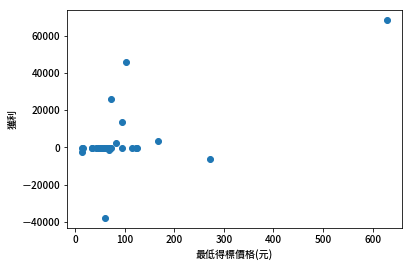

In [167]:
plt.scatter(lm6_outcome['最低得標價格(元)'], lm6_outcome['獲利'])
plt.xlabel('最低得標價格(元)')
plt.ylabel('獲利')

## 因為從殘差圖中發現 多花五塊錢可以多標到很多

In [168]:
lm7_bonus5_outcome = success_n_profit(test_df, y_test_pred7.apply(lambda x: x*1))
average_wins = sum(lm7_bonus5_outcome['獲利'][lm7_bonus5_outcome['獲利'] >0]) / sum(lm7_bonus5_outcome['有賺錢'])
average_loss = sum(lm7_bonus5_outcome['獲利'][lm7_bonus5_outcome['獲利'] <0]) / sum(lm7_bonus5_outcome['有賺錢'] == 0)
print('lm7_bonus:')
print('交易次數：%i' %(len(lm7_bonus5_outcome['獲利'])))
print('勝率：%f' %(sum(lm7_bonus5_outcome['有賺錢'])/ len(lm7_bonus5_outcome['有賺錢'])))
print('賺賠比：%f' %(abs(average_wins/ average_loss)))
print('獲利：%i' %(sum(lm7_bonus5_outcome['獲利'])))

lm7_bonus:
交易次數：30
勝率：0.166667
賺賠比：7.766617
獲利：31787


In [179]:
lm8_outcome[lm8_outcome['得標'] ==1 ]

,最低投標價格(元),最低得標價格(元),投標價,撥券日開盤價,得標,獲利,有賺錢,累積損益
1,50.00,63.60,64.285309,63.0,1,-4999.574656,0,-5499.574656
3,80.00,124.00,124.992517,115.0,1,-16742.142529,0,-22741.717185
5,168.22,270.99,307.543958,300.0,1,-23421.155694,0,-46662.872879
7,45.08,71.39,83.599115,112.0,1,23720.928993,1,-23441.943886
10,57.63,101.60,106.444909,155.0,1,42732.845500,1,18290.901614
11,415.00,628.01,648.819939,730.0,1,48239.064564,1,66529.966178
21,60.00,81.98,88.065491,92.0,1,-968.765858,0,61061.200321
22,45.69,60.88,114.845060,82.0,1,-39087.312806,0,21973.887514
23,58.12,68.88,73.040528,72.0,1,-5192.553892,0,16781.333622
24,50.00,95.00,115.022594,130.0,1,8726.276729,1,25507.610351


In [178]:
lm2_outcome[lm2_outcome['得標'] == 1]

,最低投標價格(元),最低得標價格(元),投標價,撥券日開盤價,得標,獲利,有賺錢,累積損益
5,168.22,270.99,302.918898,300.0,1,-18564.843083,0,-21064.843083
7,45.08,71.39,80.331428,112.0,1,27152.000747,1,5587.157664
10,57.63,101.60,105.927382,155.0,1,43276.249011,1,47863.406675
11,415.00,628.01,638.756903,730.0,1,58805.252264,1,106668.658939
21,60.00,81.98,86.079104,92.0,1,1116.940573,1,103285.599511
22,45.69,60.88,123.123597,82.0,1,-47779.776707,0,55505.822805
24,50.00,95.00,111.377118,130.0,1,12554.025591,1,67559.848396
25,128.81,166.80,171.935610,179.0,1,-2032.390670,0,65527.457726


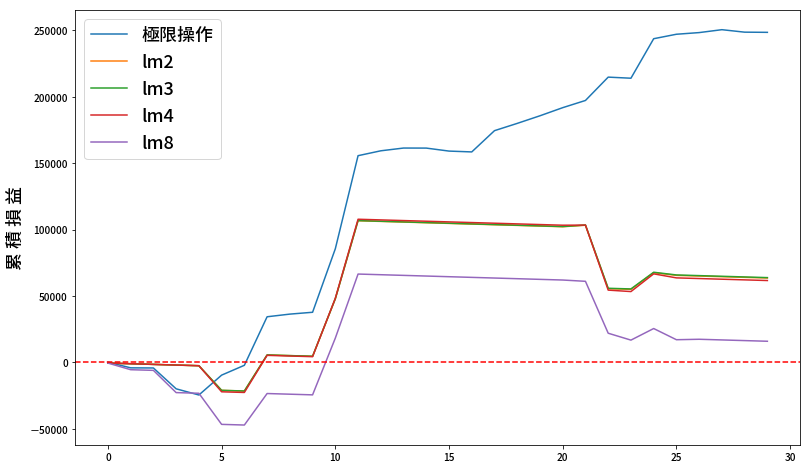

In [169]:
plt.figure(figsize = (13, 8))
plt.plot(max_profit['累積損益'], label = '極限操作')
plt.plot(lm2_outcome['累積損益'], label = 'lm2')
plt.plot(lm3_outcome['累積損益'], label = 'lm3')
plt.plot(lm4_outcome['累積損益'], label = 'lm4')
#plt.plot(lm5_outcome['累積損益'], label = 'lm5')
#plt.plot(lm6_outcome['累積損益'], label = 'lm6')
#plt.plot(lm7_outcome['累積損益'], label = 'lm7')
#plt.plot(lm7_bonus5_outcome['累積損益'], label = 'lm7_bonus5')
plt.plot(lm8_outcome['累積損益'], label = 'lm8')

plt.axhline(0, color = 'r', linestyle = '--')
plt.ylabel('累 積 損 益', fontsize = 18)
plt.legend(fontsize = 18)